# `eo-learn` basics

`eo-learn` is divided into several subpackages, as determined by their functionality and external package dependencies:

|         Subpackage        |                                                Description                                                |
|:--------------------------|:----------------------------------------------------------------------------------------------------------|
| `eo-learn-core`           | Implements basic building blocks and commonly used features.                                              |
| `eo-learn-coregistration` | The subpackage that deals with image co-registration.                                                     |
| `eo-learn-features`       | A collection of utilities for extracting data properties and feature manipulation.                        |
| `eo-learn-geometry`       | Used for geometric transformation and conversion between vector and raster data.                          |
| `eo-learn-io`             | Input/output subpackage for obtaining data from Sentinel Hub services or saving and loading data locally. |
| `eo-learn-mask`           | Used for masking data and producing cloud masks.                                                          |
| `eo-learn-ml-tools`       | Various tools that can be used before or after the machine learning process.                              |
| `eo-learn-visualization`  | Visualisation tools for core elements of `eo-learn`.                                                      |

The building blocks that `eo-learn-core` implements are:
- `EOPatch`
- `EOTask`
- `EOWorkflow`
- `EOExecutor`

With these components, processing satellite data essentially turns into defining the appropriate sequence of operations to be performed on a particular set. Modular design also makes it easier to share and reuse specific tasks in various workflows.

## 1. EOPatch

The most basic object in the package is a data container, called an `EOPatch`. It stores different types of data associated with a single geographical location, typically defined by a bounding box in a specific coordinate reference system.

<img src="images/eopatch.png">

Although there is no specified limit to the amount of data that a single `EOPatch` can store, it can only be processed if the operations do not exceed the size of your RAM. Therefore, it is customary to split larger areas into more manageable "patches".

Within an `EOPatch`, the data is split into categories, called "feature types", according to the following properties:

| `FeatureType` | Type of data | Time component |  Spatial component | Type of values | Python object | Shape |
| :-- | :-- | :-- | :-- | :-- | :-- | :-- |
| DATA | raster | <span style="color:green">yes</span> | <span style="color:green">yes</span> | float | `numpy.ndarray` | `t x n x m x d` |
| MASK | raster | <span style="color:green">yes</span> | <span style="color:green">yes</span> | integer | `numpy.ndarray` | `t x n x m x d` |
| SCALAR | raster | <span style="color:green">yes</span> | <span style="color:red">no</span> | float | `numpy.ndarray` | `t x d` |
| LABEL | raster | <span style="color:green">yes</span> | <span style="color:red">no</span> | integer | `numpy.ndarray` | `t x d` |
| DATA_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:green">yes</span> | float | `numpy.ndarray` | `n x m x d` |
| MASK_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:green">yes</span> | integer | `numpy.ndarray` | `n x m x d` |
| SCALAR_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:red">no</span> | float | `numpy.ndarray` | `d` |
| LABEL_TIMELESS | raster | <span style="color:red">no</span> | <span style="color:red">no</span> | integer | `numpy.ndarray` | `d` |
| VECTOR | vector | <span style="color:green">yes</span> | <span style="color:green">yes</span> | / | `geopandas.GeoDataFrame` | Required columns `geometry` and `TIMESTAMP` |
| VECTOR_TIMELESS | vector | <span style="color:red">no</span> | <span style="color:green">yes</span> | / | `geopandas.GeoDataFrame` | Required column `geometry` |
| META_INFO | anything | <span style="color:red">no</span> | <span style="color:red">no</span> | anything | anything | anything |
| TIMESTAMP | timestamps | <span style="color:green">yes</span> | <span style="color:red">no</span> | datetime | `list(datetime.datetime)` | `t` |
| BBOX | bounding box and CRS | <span style="color:red">no</span> | <span style="color:green">yes</span> | coordinates | `sentinelhub.BBox` | / |

Here, `t` represents the temporal dimension, `n` and `m` are spatial dimensions (height and width, respectively), and `d` is an additional component for data with multiple channels.

Note that `numpy.ndarray` objects are consistent: the spatial dimensions are the same across all time frames and channels, but we said earlier that different spectral bands have different spatial resolutions. Ordinarily, the lower-resolution bands are interpolated (or, less frequently, super-resolved) to match the highest.

We'll start by loading a locally stored `EOPatch` and displaying its contents (i.e. features):

In [1]:
import os
from eolearn.core import EOPatch

DATA_FOLDER = 'data'
PATCH_NAME = 'tutorial_eopatch'

eopatch = EOPatch.load(os.path.join(DATA_FOLDER, PATCH_NAME))

eopatch

C:\Users\jerne\Anaconda3\envs\eow\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


EOPatch(
  data: {
    BANDS-S2-L1C: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
    CLOUD_PROBABILITY: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
    NDVI: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
  }
  mask: {
    CLOUD_MASK: numpy.ndarray(shape=(68, 101, 100, 1), dtype=uint8)
    IS_DATA: numpy.ndarray(shape=(68, 101, 100, 1), dtype=uint8)
    IS_VALID: numpy.ndarray(shape=(68, 101, 100, 1), dtype=bool)
  }
  scalar: {
    CLOUD_COVERAGE: numpy.ndarray(shape=(68, 1), dtype=float16)
  }
  label: {
    IS_CLOUDLESS: numpy.ndarray(shape=(68, 1), dtype=bool)
  }
  vector: {
    CLOUD_MASK_VECTOR: geopandas.GeoDataFrame(columns=['TIMESTAMP', 'VALUE', 'geometry'], length=55, crs=EPSG:32633)
  }
  data_timeless: {
    MAX_NDVI: numpy.ndarray(shape=(101, 100, 1), dtype=float64)
  }
  mask_timeless: {
    LULC: numpy.ndarray(shape=(101, 100, 1), dtype=uint16)
    VALID_COUNT: numpy.ndarray(shape=(101, 100, 1), dtype=int64)
  }
  scalar_timeless: {
    LULC_

In [ ]:
# Note: The data does not have to be loaded right away. Try using the keyword argument "lazy_loading=True".

There are multiple ways of referencing a feature:

In [2]:
from eolearn.core import FeatureType

# This is probably the form you will use most
bands = eopatch.data['BANDS-S2-L1C']
# or
bands = eopatch['data']['BANDS-S2-L1C']
# or
bands = eopatch[FeatureType.DATA]['BANDS-S2-L1C']
# or
bands = eopatch[(FeatureType.DATA, 'BANDS-S2-L1C')]
# or
bands = eopatch.get_feature(FeatureType.DATA, 'BANDS-S2-L1C')

type(bands), bands.dtype, bands.shape

(numpy.ndarray, dtype('float32'), (68, 101, 100, 13))

Vector features are handled by `geopandas`:

In [3]:
eopatch.vector['CLOUD_MASK_VECTOR']

,TIMESTAMP,VALUE,geometry
0,2015-07-31 10:00:09,1.0,"POLYGON ((465181.0522318204 5080254.63349641, ..."
1,2015-08-20 10:07:28,1.0,"POLYGON ((465181.0522318204 5080254.63349641, ..."
2,2015-09-19 10:05:43,1.0,"POLYGON ((465181.0522318204 5080254.63349641, ..."
3,2015-09-29 10:06:33,1.0,"POLYGON ((465181.0522318204 5080254.63349641, ..."
4,2015-12-08 10:04:09,1.0,"POLYGON ((465181.0522318204 5080254.63349641, ..."
5,2015-12-08 10:11:25,1.0,"POLYGON ((465181.0522318204 5080254.63349641, ..."
6,2016-02-06 10:02:03,1.0,"POLYGON ((465630.8178817236 5080064.68197553, ..."
7,2016-02-06 10:02:03,1.0,"POLYGON ((465520.8751673028 5079654.786588368,..."
8,2016-02-06 10:02:03,1.0,"POLYGON ((465990.6304016462 5079594.801897564,..."
9,2016-02-06 10:02:03,1.0,"POLYGON ((465181.0522318204 5079444.840170554,..."


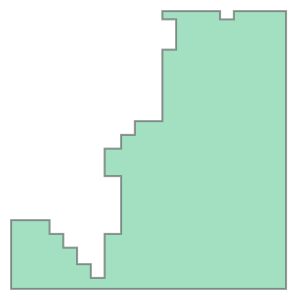

In [4]:
# Note: The individual polygons can be easily visualised by specifying the time index.
eopatch.vector['CLOUD_MASK_VECTOR']['geometry'][54]

Bounding box and timestamps:

2015-07-11 10:00:08 -- 2017-12-22 10:04:15, #timestamps=68
BBox(((465181.0522318204, 5079244.8912012065), (466180.53145382757, 5080254.63349641)), crs=CRS('32633'))


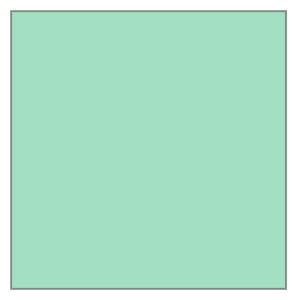

In [5]:
print('%s -- %s, #timestamps=%d' % (eopatch.timestamp[0], eopatch.timestamp[-1], len(eopatch.timestamp)))
print(repr(eopatch.bbox))

eopatch.bbox

Let's create a new `EOPatch` and store some features inside:

In [6]:
import numpy as np

my_eopatch = EOPatch()

my_eopatch.data['BANDS'] = eopatch.data['BANDS-S2-L1C']

my_eopatch.mask_timeless['NEW_MASK'] = np.zeros((10, 10, 13), dtype=np.uint8)

my_eopatch

EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {
    NEW_MASK: numpy.ndarray(shape=(10, 10, 13), dtype=uint8)
  }
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

In [ ]:
# Note: There are restrictions to what kind of data can be stored per each feature type.
#       You can check that the following wouldn't work:
#           - Storing timeless data among time-dependent features
#           - Storing time-dependent data among timeless features
#           - Storing raster data among vector features
#           - etc.

Features can be easily dereferenced:

In [7]:
del my_eopatch.data['BANDS']

my_eopatch

EOPatch(
  data: {}
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {
    NEW_MASK: numpy.ndarray(shape=(10, 10, 13), dtype=uint8)
  }
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

We can save our new `EOPatch` in a local directory. In case an `EOPatch` already exists in the specified location, we may also want to permit it to be overwritten.

In [9]:
from eolearn.core import OverwritePermission

MY_PATCH_NAME = 'my_eopatch'

my_eopatch.save(
    os.path.join(DATA_FOLDER, MY_PATCH_NAME),
    overwrite_permission=OverwritePermission.OVERWRITE_PATCH
)

In [ ]:
# Note: The other types of permissions are "ADD_ONLY" and "OVERWRITE_FEATURES".
#       The latter should be used in conjuction with the "features" keyword argument,
#       e.g. "features=[(FeatureType.DATA, 'BANDS')]".

### 1.1 Visualisation

There are some legacy `EOPatch` plotting methods that will only work if `eo-learn-visualization` had been installed in full...

In [ ]:
eopatch.plot((FeatureType.DATA, 'BANDS-S2-L1C'))

...but you can always resort to simply using `matplotlib`:

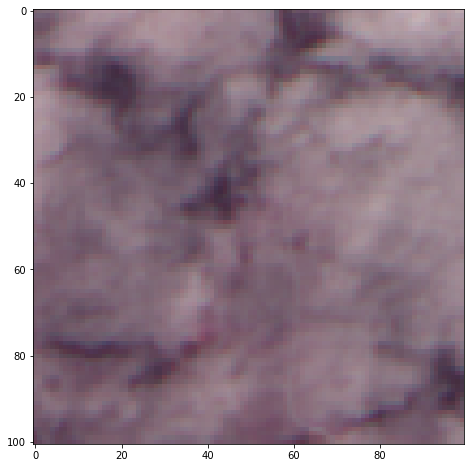

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))

# Sometimes, the images can be a bit too dark to see clearly, hence the brightness factor
t_idx = 1
brightness_factor = 3.5

plt.imshow(eopatch.data['BANDS-S2-L1C'][t_idx][..., [4,3,2]] * brightness_factor);

In [ ]:
# Note: [4,3,2] specifies the red, green, and blue bands, respectively.
#       You can try setting the RGB channels to some other band combination (false-colour).

## 2. EOTask

Following `EOPatch` is the `EOTask`, which represents a single well-defined operation on one or more `EOPatch` instances.

We can create a new `EOTask` by inheriting from the abstract `EOTask` class:

```Python
class SomeTask(EOTask):
    """Does something to an EOPatch."""
    
    def __init__(self, *task_specific_params):
        self.task_specific_params = task_specific_params
        
    def execute(self, eopatch, *eopatches, **patch_specific_params):
        """Performs the task on the given EOPatch and returns it."""
    
        return eopatch
```

The tasks that we create must implement the `execute` method, which needs to conform to the following:
- The positional arguments should be instances of `EOPatch`.
- Everything else should be specified in the form of keyword arguments.
- Its output should be a single `EOPatch` instance.

Each task can thus be viewed as having up to multiple inputs and a single output. This is important when constructing chains of tasks with more complex interactions between them.

In [ ]:
# Note: Why can't multiple eopatches be returned as well?

An example of a task that adds a new feature to an `EOPatch`...

In [12]:
from eolearn.core import EOTask

class AddFeature(EOTask):
    """Adds a feature to an EOPatch."""
    
    def __init__(self, feature):
        self.feature = feature

    def execute(self, eopatch, *, data):
        """Returns the EOPatch with added features."""
        
        eopatch[self.feature] = data

        return eopatch

...which would be used like so:

In [13]:
eopatch = EOPatch()

add_feature_task = AddFeature((FeatureType.DATA, 'NEW_BANDS'))

data = np.zeros((7, 64, 64, 13))

eopatch = add_feature_task.execute(eopatch, data=data)
# or simply
# eopatch = add_feature_task(eopatch, data=data)

eopatch

EOPatch(
  data: {
    NEW_BANDS: numpy.ndarray(shape=(7, 64, 64, 13), dtype=float64)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

In [ ]:
# Note: Try using a custom EOTask to rename "NEW_BANDS" to something else.
#       Bonus points if you use both it and "AddFeature" as well (to 'get you thinking with tasks').

Various `EOTasks` represent a large part of `eo-learn`. The list of all integrated tasks is available [here](https://eo-learn.readthedocs.io/en/latest/eotasks.html).

## 3. EOWorkflow

`EOTask` instances can be connected into acyclic processing graphs through the `EOWorkflow`.

To get a clear picture of how it works, we will break one of our rules from before by running an example with integers instead of `EOPatch` instances.

In [14]:
from eolearn.core import EOWorkflow

class FakeTask(EOTask):
    def __init__(self, id_val):
        self.id = id_val
        
    def execute(self, *eopatches, **kwargs):
        print(eopatches, kwargs, self.id)
        
        return self.id

ft1 = FakeTask(1)
ft2 = FakeTask(2)

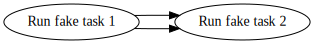

In [15]:
# Define the graph by specify dependencies (and descriptions)
workflow = EOWorkflow([
    (ft1, [], 'Run fake task 1'),
    (ft2, [ft1, ft1], 'Run fake task 2')
])

# Visualise the graph
workflow.dependency_graph()

In [16]:
# Execute the workflow, specifying patch-specific arguments for each task
result = workflow.execute({
    ft1: {},
    ft2: {'a': 0, 'b': 0}
})

# Shows the final output(s)
result

() {} 1
(1, 1) {'a': 0, 'b': 0} 2


WorkflowResults(
  Dependency(Run fake task 2):
    2
)

In [ ]:
# Note: Data is put into the workflow either by specifying arguments or through the tasks themselves,
#       e.g. by using a task to load the data.

In [ ]:
# Note: EOWorkflow cannot form acyclic graphs and cannot execute the same tasks multiple times.

In [ ]:
# Note: Tasks can be run in parallel, as long as they don't share any dependencies.

Here is a simple example of an actual `EOWorkflow`:

In [17]:
from eolearn.core import LoadTask, SaveTask

new_feature = (FeatureType.LABEL, 'NEW_LABEL')

load_task = LoadTask(folder=DATA_FOLDER)

add_feature_task = AddFeature(new_feature)

save_task = SaveTask(
    folder=DATA_FOLDER,
    features=[new_feature],
    overwrite_permission=OverwritePermission.OVERWRITE_FEATURES
)

# Define the graph
workflow = EOWorkflow([
    (load_task, [], 'Load EOPatch'),
    (add_feature_task, [load_task], 'Add a new feature'),
    (save_task, [add_feature_task], 'Save EOPatch')
])

# Execute the workflow
result = workflow.execute({
    load_task: {
        'eopatch_folder': MY_PATCH_NAME
    },
    add_feature_task: {
        'data': np.zeros((10, 3), dtype=np.uint8)
    },
    save_task: {
        'eopatch_folder': MY_PATCH_NAME
    }
})

result

C:\Users\jerne\Anaconda3\envs\eow\lib\site-packages\eolearn\core\core_tasks.py:166: DeprecationWarning: This task is deprecated, use LoadTask instead
  warnings.warn('This task is deprecated, use LoadTask instead', DeprecationWarning)
C:\Users\jerne\Anaconda3\envs\eow\lib\site-packages\eolearn\core\core_tasks.py:127: DeprecationWarning: This task is deprecated, use SaveTask instead
  warnings.warn('This task is deprecated, use SaveTask instead', DeprecationWarning)


WorkflowResults(
  Dependency(Save EOPatch):
    EOPatch(
      data: {}
      mask: {}
      scalar: {}
      label: {
        NEW_LABEL: numpy.ndarray(shape=(10, 3), dtype=uint8)
      }
      vector: {}
      data_timeless: {}
      mask_timeless: {
        NEW_MASK: numpy.ndarray(shape=(10, 10, 13), dtype=uint8)
      }
      scalar_timeless: {}
      label_timeless: {}
      vector_timeless: {}
      meta_info: {}
      bbox: None
      timestamp: []
    )
)

The above workflow is purposefully simple, but many workflows are linear in practice as well. In such cases, the convenient `LinearWorkflow` removes the need to specify dependencies between the tasks:

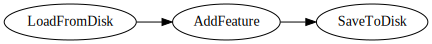

In [18]:
from eolearn.core import LinearWorkflow

workflow = LinearWorkflow(
    load_task,
    add_feature_task,
    save_task
)

workflow.dependency_graph()

## 4. EOExecutor

`EOExecutor` handles the execution of workflows more elaborately. It enables workflows to be executed multiple times or in parallel, it monitors execution times, and handles errors that might occur in the process.

Executing the previously defined workflow with different arguments:

In [19]:
from eolearn.core import EOExecutor

# The workflow will be executed for each of these 3 dictionaries
execution_args = [
    {
        load_task: {
            'eopatch_folder': MY_PATCH_NAME
        },
        add_feature_task: {
            'data': idx * np.ones((10, 3), dtype=np.uint8)
        },
        save_task: {
            'eopatch_folder': MY_PATCH_NAME + '_v%d' % idx}
    } for idx in range(3)
]

LOGS_FOLDER = os.path.join(DATA_FOLDER, 'logs')

if not os.path.exists(LOGS_FOLDER):
    os.makedirs(LOGS_FOLDER)

executor = EOExecutor(workflow, execution_args, save_logs=True, logs_folder=LOGS_FOLDER)

# The number of workers is analogous to the number of parallel processes
# The "multiprocess" keyword switches between threading vs multiprocessing modes of parallelism
executor.run(workers=3, multiprocess=False)

Finally, it can also compile the logs and produce a report containing the summary of the workflow's execution process that is viewable in the browser (particularly useful for debugging):

In [20]:
executor.make_report()

print('Report saved to: %s' % executor.get_report_filename())

Report saved to: data\logs\eoexecution-report-2020_04_24-03_21_40\report.html


These basic components should be well known, but the rest of `eo-learn` can be discovered on a case by case basis.